In [115]:
#this magic code makes plots interactive and updatable.
%matplotlib inLine

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
from scipy.stats import linregress
pd.options.display.max_columns = None

In [117]:
#crime= pd.read_csv('Crimes_-_2001_to_Present.csv')
#crime= crime[["Primary Type", "Description", "Location Description", "Arrest", "Domestic", "Year","Community Area"]]
#crime.dropna(inplace=True)
public= pd.read_csv('data/Public_Health_Statistics-_Selected_public_health_indicators_by_Chicago_community_area.csv')
#total = pd.merge(public, crime, on='Community Area')

In [118]:
public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 29 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Community Area                              77 non-null     int64  
 1   Community Area Name                         77 non-null     object 
 2   Birth Rate                                  77 non-null     float64
 3   General Fertility Rate                      77 non-null     float64
 4   Low Birth Weight                            77 non-null     float64
 5   Prenatal Care Beginning in First Trimester  77 non-null     float64
 6   Preterm Births                              77 non-null     float64
 7   Teen Birth Rate                             77 non-null     float64
 8   Assault (Homicide)                          77 non-null     float64
 9   Breast cancer in females                    77 non-null     float64
 10  Cancer (All Site

In [119]:
#rename columns to represent data type per column
public.rename(columns = {'Birth Rate':'Birth Rate per (1k)'}, inplace = True)
public.rename(columns = {'General Fertility Rate':'General Fertility Rate per (1k)'}, inplace = True) 
public.rename(columns = {'Low Birth Weight':'% Low Birth Weight'}, inplace = True)
public.rename(columns = {'Prenatal Care Beginning in First Trimester':'% Prenatal Care in First Trimester'}, inplace = True)
public.rename(columns = {'Preterm Births':'% Preterm Births'}, inplace = True)
public.rename(columns = {'Teen Birth Rate':'Teen Birth Rate per (1k)'}, inplace = True)
public.rename(columns = {'Assault (Homicide)':'Homicides per (100k)'}, inplace = True)
public.rename(columns = {'Breast cancer in females':'Breast Cancer Females per (100k)'}, inplace = True)
public.rename(columns = {'Cancer (All Sites)':'Cancer (All Sites) per (100k)'}, inplace = True)
public.rename(columns = {'Colorectal Cancer':'Colorectal Cancer per (100k)'}, inplace = True)
public.rename(columns = {'Diabetes-related':'Diabetes-related per (100k)'}, inplace = True)
public.rename(columns = {'Firearm-related':'Firearm-related per (100k)'}, inplace = True)
public.rename(columns = {'Infant Mortality Rate':'Infant Mortality Rate per (1k)'}, inplace = True)
public.rename(columns = {'Lung Cancer':'Lung Cancer per (100k)'}, inplace = True)
public.rename(columns = {'Prostate Cancer in Males':'Prostate Cancer in Males per (100k)'}, inplace = True)
public.rename(columns = {'Stroke (Cerebrovascular Disease)':'Stroke (Cerebrovascular Disease) per (100k)'}, inplace = True)
public.rename(columns = {'Childhood Blood Lead Level Screening':'Childhood Blood Lead Level Screening per (1k)'}, inplace = True)
public.rename(columns = {'Childhood Lead Poisoning':'Childhood Lead Poisoning per (100)'}, inplace = True)
public.rename(columns = {'Gonorrhea in Females':'Gonorrhea in Females per (100k)'}, inplace = True)
public.rename(columns = {'Gonorrhea in Males':'Gonorrhea in Males per (100k)'}, inplace = True)
public.rename(columns = {'Tuberculosis':'Tuberculosis per (100k)'}, inplace = True)
public.rename(columns = {'Below Poverty Level':'% Below Poverty Level'}, inplace = True)
public.rename(columns = {'Crowded Housing':'% Crowded Housing'}, inplace = True)
public.rename(columns = {'Dependency':'% Dependency'}, inplace = True)
public.rename(columns = {'No High School Diploma':'% No High School Diploma'}, inplace = True)
public.rename(columns = {'Unemployment ':'% Unemployed'}, inplace = True)

In [120]:
public

,Community Area,Community Area Name,Birth Rate per (1k),General Fertility Rate per (1k),% Low Birth Weight,% Prenatal Care in First Trimester,% Preterm Births,Teen Birth Rate per (1k),Homicides per (100k),Breast Cancer Females per (100k),Cancer (All Sites) per (100k),Colorectal Cancer per (100k),Diabetes-related per (100k),Firearm-related per (100k),Infant Mortality Rate per (1k),Lung Cancer per (100k),Prostate Cancer in Males per (100k),Stroke (Cerebrovascular Disease) per (100k),Childhood Blood Lead Level Screening per (1k),Childhood Lead Poisoning per (100),Gonorrhea in Females per (100k),Gonorrhea in Males per (100k),Tuberculosis per (100k),% Below Poverty Level,% Crowded Housing,% Dependency,% No High School Diploma,Per Capita Income,Unemployment
0,1,Rogers Park,16.4,62.0,11.0,73.0,11.2,40.8,7.7,23.3,176.9,25.3,77.1,5.2,6.4,36.7,21.7,33.7,364.7,0.5,322.5,423.3,11.4,22.7,7.9,28.8,18.1,23714,7.5
1,2,West Ridge,17.3,83.3,8.1,71.1,8.3,29.9,5.8,20.2,155.9,17.3,60.5,3.7,5.1,36.0,14.2,34.7,331.4,1.0,141.0,205.7,8.9,15.1,7.0,38.3,19.6,21375,7.9
2,3,Uptown,13.1,50.5,8.3,77.7,10.3,35.1,5.4,21.3,183.3,20.5,80.0,4.6,6.5,50.5,25.2,41.7,353.7,0.5,170.8,468.7,13.6,22.7,4.6,22.2,13.6,32355,7.7
3,4,Lincoln Square,17.1,61.0,8.1,80.5,9.7,38.4,5.0,21.7,153.2,8.6,55.4,6.1,3.8,43.1,27.6,36.9,273.3,0.4,98.8,195.5,8.5,9.5,3.1,25.6,12.5,35503,6.8
4,5,North Center,22.4,76.2,9.1,80.4,9.8,8.4,1.0,16.6,152.1,26.1,49.8,1.0,2.7,42.4,15.1,41.6,178.1,0.9,85.4,188.6,1.9,7.1,0.2,25.5,5.4,51615,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,Washington Heights,12.0,61.0,19.6,75.4,16.2,65.0,38.0,47.9,260.6,29.7,79.5,35.6,11.2,70.0,56.2,57.6,371.4,1.5,1298.2,1274.2,3.0,15.7,1.1,42.4,15.6,19709,18.3
73,74,Mount Greenwood,12.5,59.0,8.4,94.5,15.1,7.7,2.2,34.6,201.1,24.8,66.5,7.4,3.3,55.0,16.9,26.7,133.6,0.0,NaN,.,0.0,3.1,1.1,37.0,4.5,34221,6.9
74,75,Morgan Park,13.2,67.5,10.6,74.5,12.3,46.7,19.9,32.4,218.2,27.1,75.4,15.8,13.1,50.0,39.8,47.9,298.8,1.3,800.5,741.1,2.6,13.7,0.8,39.4,10.9,26185,14.9
75,76,O'Hare,15.8,70.0,3.5,82.0,5.0,15.9,5.6,20.5,138.5,8.7,47.3,11.8,2.0,37.4,2.8,40.4,182.9,0.5,NaN,.,6.3,9.5,1.9,26.5,11.0,29402,4.7


# Sorting Chicago Areas by Per Capita Income
We will plot the health data against this for a few graphs.

In [121]:
community_df = public.sort_values(by=['Per Capita Income'], ascending=False)
community_df

,Community Area,Community Area Name,Birth Rate per (1k),General Fertility Rate per (1k),% Low Birth Weight,% Prenatal Care in First Trimester,% Preterm Births,Teen Birth Rate per (1k),Homicides per (100k),Breast Cancer Females per (100k),Cancer (All Sites) per (100k),Colorectal Cancer per (100k),Diabetes-related per (100k),Firearm-related per (100k),Infant Mortality Rate per (1k),Lung Cancer per (100k),Prostate Cancer in Males per (100k),Stroke (Cerebrovascular Disease) per (100k),Childhood Blood Lead Level Screening per (1k),Childhood Lead Poisoning per (100),Gonorrhea in Females per (100k),Gonorrhea in Males per (100k),Tuberculosis per (100k),% Below Poverty Level,% Crowded Housing,% Dependency,% No High School Diploma,Per Capita Income,Unemployment
7,8,Near North Side,10.7,35.9,8.6,69.7,9.6,34.0,3.7,24.0,142.7,15.1,27.0,3.2,6.5,33.6,15.1,22.0,311.2,0.1,244.4,235.8,5.5,13.4,2.0,23.3,3.4,87163,5.2
6,7,Lincoln Park,13.2,38.7,6.6,75.7,7.8,2.1,0.7,23.7,152.9,16.7,50.1,2.3,2.4,40.0,27.3,35.3,173.3,0.6,50.3,93.1,1.2,11.8,0.6,20.4,4.3,71403,4.5
31,32,Loop,9.4,27.7,5.3,78.2,6.9,1.3,0.7,20.2,120.1,10.8,26.8,4.0,5.7,29.2,17.2,39.0,297.3,0.3,129.9,200.5,6.5,11.1,2.0,15.5,3.4,67699,4.2
32,33,Near South Side,21.4,72.9,8.8,78.1,10.9,50.9,4.8,31.9,169.0,19.2,61.5,6.6,4.8,46.2,51.4,52.4,301.3,0.2,300.6,318.7,5.0,11.1,1.4,21.0,7.1,60593,5.7
5,6,Lake View,13.5,38.7,6.3,79.1,8.1,15.8,1.4,20.1,126.9,13.0,38.5,1.8,2.2,32.5,17.0,24.4,179.2,0.4,81.8,357.6,3.2,10.5,1.2,16.5,2.9,58227,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,West Garfield Park,20.1,88.4,17.0,71.4,17.5,114.9,40.0,54.7,291.5,31.4,118.2,36.0,19.0,65.3,75.0,77.0,516.1,1.4,3193.3,2336.7,6.5,40.3,8.9,42.5,26.2,10951,25.2
29,30,South Lawndale,19.5,94.9,7.6,85.1,9.6,77.5,11.1,13.2,127.4,9.2,65.0,8.6,5.9,15.9,32.7,37.3,605.9,0.8,289.5,106.8,7.9,28.1,17.6,33.1,58.7,10697,11.5
66,67,West Englewood,20.3,93.3,16.1,63.6,13.8,116.9,47.2,39.2,247.6,24.4,88.2,39.3,13.3,66.3,75.0,64.6,450.6,2.6,2762.2,2545.7,10.9,32.3,6.9,40.9,30.3,10559,34.7
36,37,Fuller Park,11.9,60.4,17.1,71.4,14.3,69.2,49.6,8.5,258.9,21.1,111.7,22.6,22.6,89.6,70.5,82.4,489.9,2.5,1061.9,1556.4,0.0,55.5,4.5,38.2,33.7,9016,40.0


In [122]:
# get a list of columns
cols = list(community_df)

# move the column to head of list using index, pop and insert
cols.insert(2, cols.pop(cols.index('Per Capita Income')))

community_df = community_df.loc[:, cols]
community_df.set_index('Community Area', inplace=True)

community_df

,Community Area Name,Per Capita Income,Birth Rate per (1k),General Fertility Rate per (1k),% Low Birth Weight,% Prenatal Care in First Trimester,% Preterm Births,Teen Birth Rate per (1k),Homicides per (100k),Breast Cancer Females per (100k),Cancer (All Sites) per (100k),Colorectal Cancer per (100k),Diabetes-related per (100k),Firearm-related per (100k),Infant Mortality Rate per (1k),Lung Cancer per (100k),Prostate Cancer in Males per (100k),Stroke (Cerebrovascular Disease) per (100k),Childhood Blood Lead Level Screening per (1k),Childhood Lead Poisoning per (100),Gonorrhea in Females per (100k),Gonorrhea in Males per (100k),Tuberculosis per (100k),% Below Poverty Level,% Crowded Housing,% Dependency,% No High School Diploma,Unemployment
Community Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,Near North Side,87163,10.7,35.9,8.6,69.7,9.6,34.0,3.7,24.0,142.7,15.1,27.0,3.2,6.5,33.6,15.1,22.0,311.2,0.1,244.4,235.8,5.5,13.4,2.0,23.3,3.4,5.2
7,Lincoln Park,71403,13.2,38.7,6.6,75.7,7.8,2.1,0.7,23.7,152.9,16.7,50.1,2.3,2.4,40.0,27.3,35.3,173.3,0.6,50.3,93.1,1.2,11.8,0.6,20.4,4.3,4.5
32,Loop,67699,9.4,27.7,5.3,78.2,6.9,1.3,0.7,20.2,120.1,10.8,26.8,4.0,5.7,29.2,17.2,39.0,297.3,0.3,129.9,200.5,6.5,11.1,2.0,15.5,3.4,4.2
33,Near South Side,60593,21.4,72.9,8.8,78.1,10.9,50.9,4.8,31.9,169.0,19.2,61.5,6.6,4.8,46.2,51.4,52.4,301.3,0.2,300.6,318.7,5.0,11.1,1.4,21.0,7.1,5.7
6,Lake View,58227,13.5,38.7,6.3,79.1,8.1,15.8,1.4,20.1,126.9,13.0,38.5,1.8,2.2,32.5,17.0,24.4,179.2,0.4,81.8,357.6,3.2,10.5,1.2,16.5,2.9,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,West Garfield Park,10951,20.1,88.4,17.0,71.4,17.5,114.9,40.0,54.7,291.5,31.4,118.2,36.0,19.0,65.3,75.0,77.0,516.1,1.4,3193.3,2336.7,6.5,40.3,8.9,42.5,26.2,25.2
30,South Lawndale,10697,19.5,94.9,7.6,85.1,9.6,77.5,11.1,13.2,127.4,9.2,65.0,8.6,5.9,15.9,32.7,37.3,605.9,0.8,289.5,106.8,7.9,28.1,17.6,33.1,58.7,11.5
67,West Englewood,10559,20.3,93.3,16.1,63.6,13.8,116.9,47.2,39.2,247.6,24.4,88.2,39.3,13.3,66.3,75.0,64.6,450.6,2.6,2762.2,2545.7,10.9,32.3,6.9,40.9,30.3,34.7


# Chicago Cancer Rates by Per Capita Income

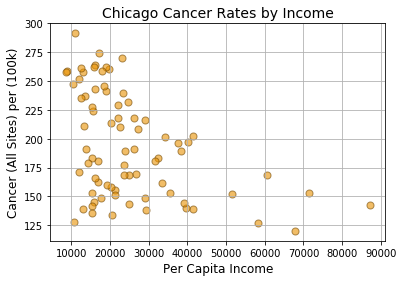

In [140]:
plt.scatter(community_df['Per Capita Income'], community_df['Cancer (All Sites) per (100k)'], marker="o", s=50, facecolors='#E99202', edgecolors='#754901', alpha=0.6)
plt.title("Chicago Cancer Rates by Income", fontsize=14)
plt.xlabel("Per Capita Income", fontsize=12)
plt.ylabel("Cancer (All Sites) per (100k)", fontsize=12)
plt.grid(True)
#plt.savefig('../images/lat_temp.png', bbox_inches='tight')
plt.show()


# Chicago General Fertility Rate by Per Capita Income

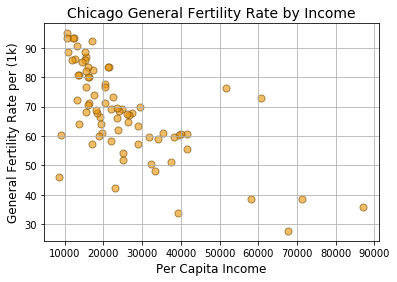

In [147]:
plt.scatter(community_df['Per Capita Income'], community_df['General Fertility Rate per (1k)'], marker="o", s=50, facecolors='#E99202', edgecolors='#754901', alpha=0.6)
plt.title("Chicago General Fertility Rate by Income", fontsize=14)
plt.xlabel("Per Capita Income", fontsize=12)
plt.ylabel("General Fertility Rate per (1k)", fontsize=12)
plt.grid(True)
#plt.savefig('../images/lat_temp.png', bbox_inches='tight')
plt.show()

# Chicago Infant Mortality Rate by Per Capita Income
It appears the population making below \\$10,000 do not have as many children as people making just over \\$10,000 per year. Also this population has lower general cancer rates than the popluation making Just over \\$10,000 a year. I'm wondering who this group of individuals are?

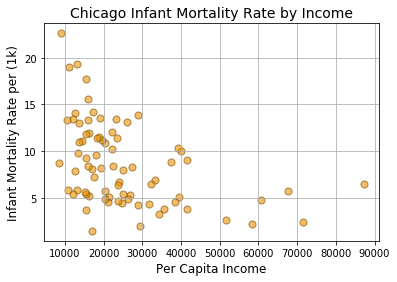

In [148]:
plt.scatter(community_df['Per Capita Income'], community_df['Infant Mortality Rate per (1k)'], marker="o", s=50, facecolors='#E99202', edgecolors='#754901', alpha=0.6)
plt.title("Chicago Infant Mortality Rate by Income", fontsize=14)
plt.xlabel("Per Capita Income", fontsize=12)
plt.ylabel("Infant Mortality Rate per (1k)", fontsize=12)
plt.grid(True)
#plt.savefig('../images/lat_temp.png', bbox_inches='tight')
plt.show()

In [155]:
community_sub_10k_df = community_df[community_df['Per Capita Income'] < 10242]
community_sub_10k_df

,Community Area Name,Per Capita Income,Birth Rate per (1k),General Fertility Rate per (1k),% Low Birth Weight,% Prenatal Care in First Trimester,% Preterm Births,Teen Birth Rate per (1k),Homicides per (100k),Breast Cancer Females per (100k),Cancer (All Sites) per (100k),Colorectal Cancer per (100k),Diabetes-related per (100k),Firearm-related per (100k),Infant Mortality Rate per (1k),Lung Cancer per (100k),Prostate Cancer in Males per (100k),Stroke (Cerebrovascular Disease) per (100k),Childhood Blood Lead Level Screening per (1k),Childhood Lead Poisoning per (100),Gonorrhea in Females per (100k),Gonorrhea in Males per (100k),Tuberculosis per (100k),% Below Poverty Level,% Crowded Housing,% Dependency,% No High School Diploma,Unemployment
Community Area,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,Fuller Park,9016,11.9,60.4,17.1,71.4,14.3,69.2,49.6,8.5,258.9,21.1,111.7,22.6,22.6,89.6,70.5,82.4,489.9,2.5,1061.9,1556.4,0.0,55.5,4.5,38.2,33.7,40.0
54,Riverdale,8535,12.5,46.1,15.3,74.1,16.5,64.5,33.0,25.0,258.3,39.4,115.9,32.8,8.7,86.1,42.5,80.6,NaN,NaN,1699.7,1397.9,5.8,61.4,5.1,50.2,24.6,26.4


# The sub-\\$10,000 per year population in Chicago
The data shows that this sub-\\$10,000 per year population of Chicago, live in the two most impoverished areas of Chicago. Currently Riverdale has the highest "hardship index" of any Chicago community area.
It may be that these areas submit less census data then other areas of chicago. More research is needed to see this anomaly in the dataset.